In [122]:
from scipy import io, fft, signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [123]:
#3 Data of Deep Breaths, first element of element is sample rate, second element of element is the data.
healthy = [[[], []], [[], []], [[], []]]
pos_mild = [[[], []], [[], []], [[], []]]
pos_mod = [[[], []], [[], []], [[], []]]

healthy[0][0], healthy[0][1] = wavfile.read("./corona_dataset/healthy/5eEXozx61BXKT71PLRaQASRcC832/breathing-deep.wav")
healthy[1][0], healthy[1][1] = wavfile.read("./corona_dataset/healthy/FGRDO4IBbAejR0WHD5YbkXTCasg2/breathing-deep.wav")
healthy[2][0], healthy[2][1] = wavfile.read("./corona_dataset/healthy/n4t5cgNQKXO3F8KP55vWOgYWcXC3/breathing-deep.wav")

pos_mild[0][0], pos_mild[0][1] = wavfile.read("./corona_dataset/positive_mild/1e8i6Q47ewbzrTiKqIeOLEvPv2Z2/breathing-deep.wav")
pos_mild[1][0], pos_mild[1][1] = wavfile.read("./corona_dataset/positive_mild/bH6WQVvClVRDer6iOFvaGiz0luf1/breathing-deep.wav")
pos_mild[2][0], pos_mild[2][1] = wavfile.read("./corona_dataset/positive_mild/wXChdMlWemXwRdX642WnX6JbYfA2/breathing-deep.wav")

pos_mod[0][0], pos_mod[0][1] = wavfile.read("./corona_dataset/positive_moderate/OnYf35hpRnNpCxV6vTU9n2ETMiD2/breathing-deep.wav")
pos_mod[1][0], pos_mod[1][1] = wavfile.read("./corona_dataset/positive_moderate/QjBZv868nydJzk0ZzwgKDHSG6Q82/breathing-deep.wav")
pos_mod[2][0], pos_mod[2][1] = wavfile.read("./corona_dataset/positive_moderate/W42AKc6SZlNz1NOBAJrCpa3Io0E2/breathing-deep.wav")

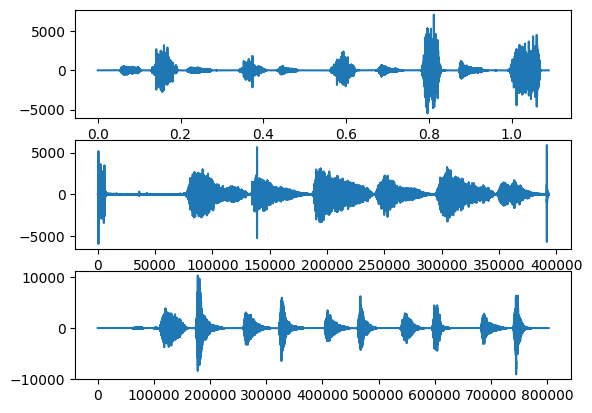

In [124]:
#HEALTHY
fig, axs = plt.subplots(3)

axs[0].plot(healthy[0][1])
axs[1].plot(healthy[1][1])
axs[2].plot(healthy[2][1])

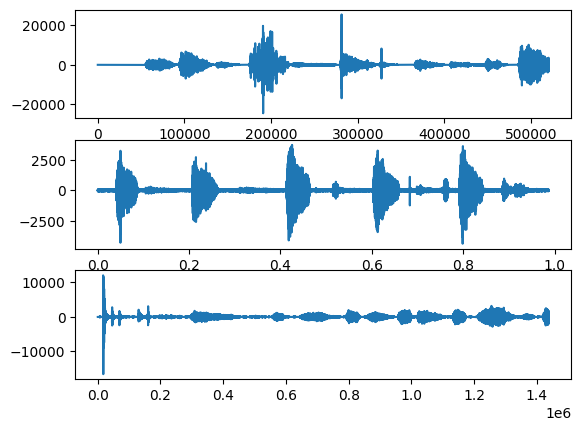

In [125]:
#POSITIVE MILD
fig, axs = plt.subplots(3)

axs[0].plot(pos_mild[0][1])
axs[1].plot(pos_mild[1][1])
axs[2].plot(pos_mild[2][1])

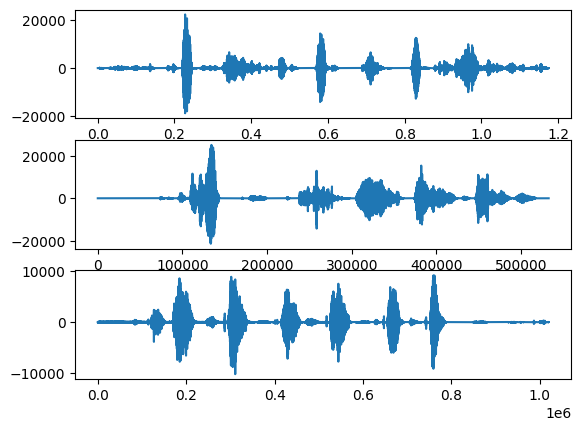

In [126]:
#POSITIVE MODERATE
fig, axs = plt.subplots(3)

axs[0].plot(pos_mod[0][1])
axs[1].plot(pos_mod[1][1])
axs[2].plot(pos_mod[2][1])

In [127]:
NH = []
TH = []
NPMi = []
TPMi = []
NPMo = []
TPMo = []

for i in range(3):
    NH.append(len(healthy[i][1]))
    TH.append(1./healthy[i][0])
    NPMi.append(len(pos_mild[i][1]))
    TPMi.append(1./pos_mild[i][0])
    NPMo.append(len(pos_mod[i][1]))
    TPMo.append(1./pos_mod[i][0])

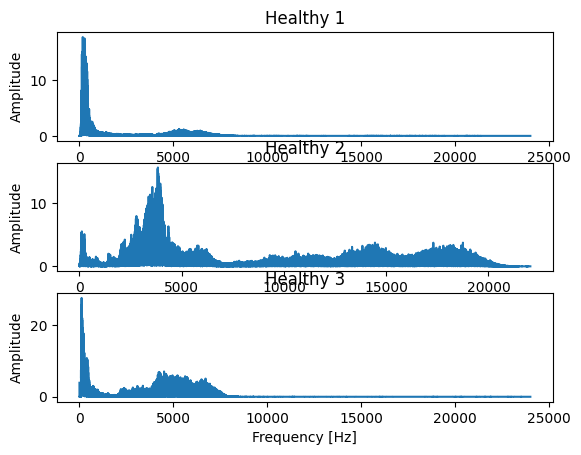

In [128]:
#FFT Healthy
fig, axs = plt.subplots(3)

for i in range(3):
    fft_func = fft.fft(healthy[i][1])
    xf = fft.fftfreq(NH[i], TH[i])[:NH[i]//2]
    axs[i].plot(xf, 2.0/NH[i] * np.abs(fft_func[0:NH[i]//2]))

    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title('Healthy ' + str(i+1))

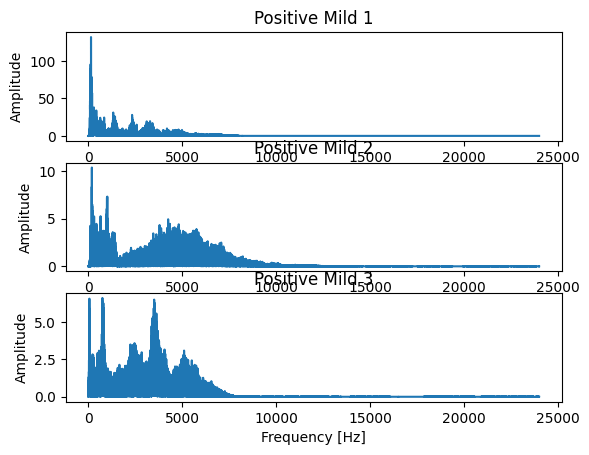

In [129]:
#FFT Positive Mild
fig, axs = plt.subplots(3)

for i in range(3):
    fft_func = fft.fft(pos_mild[i][1])
    xf = fft.fftfreq(NPMi[i], TPMi[i])[:NPMi[i]//2]
    axs[i].plot(xf, 2.0/NPMi[i] * np.abs(fft_func[0:NPMi[i]//2]))

    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title('Positive Mild ' + str(i+1))

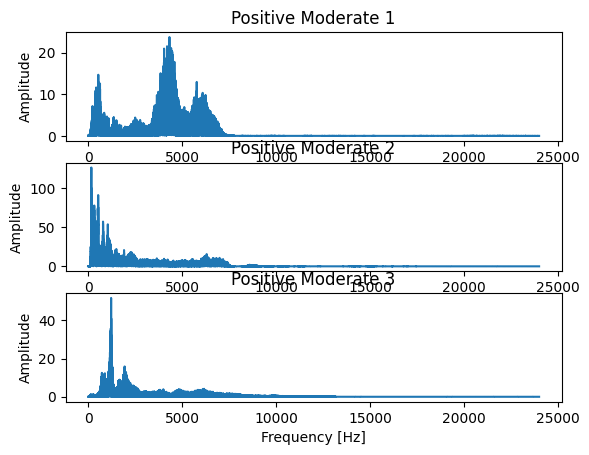

In [130]:
#FFT Positive Moderate
fig, axs = plt.subplots(3)

for i in range(3):
    fft_func = fft.fft(pos_mod[i][1])
    xf = fft.fftfreq(NPMo[i], TPMo[i])[:NPMo[i]//2]
    axs[i].plot(xf, 2.0/NPMo[i] * np.abs(fft_func[0:NPMo[i]//2]))

    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title('Positive Moderate ' + str(i+1))


In [131]:
#Filtering 3000Hz - 6000Hz
healthy_f = []
pos_mild_f = []
pos_mod_f = []

#Healthy
for i in range(3):
    sos = signal.butter(10, [3000, 6000], 'bp', fs=healthy[i][0], output='sos')
    healthy_f.append(signal.sosfilt(sos, healthy[i][1]))

#Positive Mild
for i in range(3):
    sos = signal.butter(10, [3000, 6000], 'bp', fs=pos_mild[i][0], output='sos')
    pos_mild_f.append(signal.sosfilt(sos, pos_mild[i][1]))

#Positive Moderate
for i in range(3):
    sos = signal.butter(10, [3000, 6000], 'bp', fs=pos_mod[i][0], output='sos')
    pos_mod_f.append(signal.sosfilt(sos, pos_mod[i][1]))

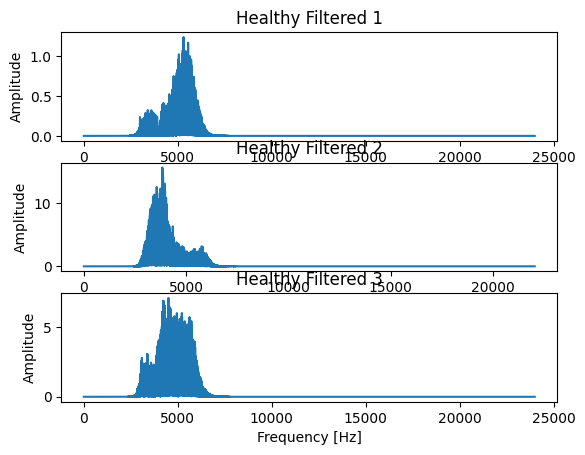

In [132]:
#FFT Healthy Filtered
fig, axs = plt.subplots(3)

for i in range(3):
    fft_func = fft.fft(healthy_f[i])
    xf = fft.fftfreq(NH[i], TH[i])[:NH[i]//2]
    axs[i].plot(xf, 2.0/NH[i] * np.abs(fft_func[0:NH[i]//2]))

    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title('Healthy Filtered ' + str(i+1))

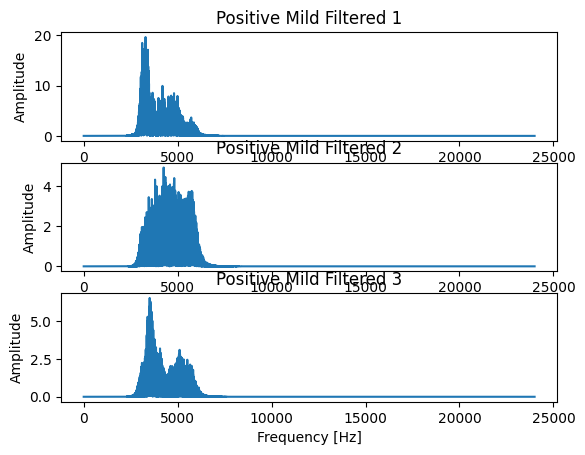

In [133]:

#FFT Positive Mild Filtered
fig, axs = plt.subplots(3)

for i in range(3):
    fft_func = fft.fft(pos_mild_f[i])
    xf = fft.fftfreq(NPMi[i], TPMi[i])[:NPMi[i]//2]
    axs[i].plot(xf, 2.0/NPMi[i] * np.abs(fft_func[0:NPMi[i]//2]))

    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title('Positive Mild Filtered ' + str(i+1))

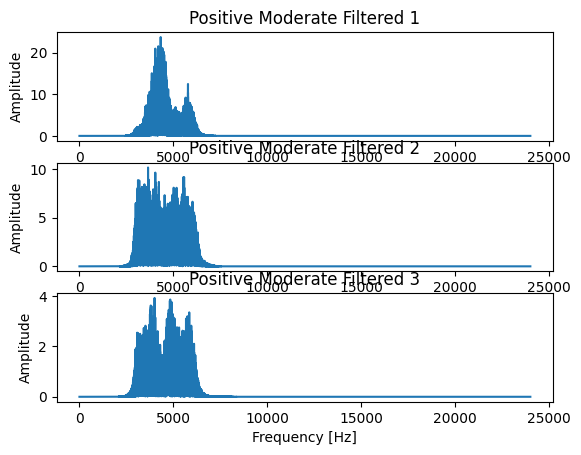

In [134]:
#FFT Positive Moderate Filtered
fig, axs = plt.subplots(3)

for i in range(3):
    fft_func = fft.fft(pos_mod_f[i])
    xf = fft.fftfreq(NPMo[i], TPMo[i])[:NPMo[i]//2]
    axs[i].plot(xf, 2.0/NPMo[i] * np.abs(fft_func[0:NPMo[i]//2]))

    axs[i].set_xlabel('Frequency [Hz]')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title('Positive Moderate Filtered ' + str(i+1))

In [136]:
#Write Files
for i in range(3):
    wavfile.write('output/healthy_filtered' + str(i+1) + '.wav', healthy[i][0], healthy_f[i].astype(np.int16))
    wavfile.write('output/pos_mild_filtered' + str(i+1) + '.wav', pos_mild[i][0], pos_mild_f[i].astype(np.int16))
    wavfile.write('output/pos_mod_filtered' + str(i+1) + '.wav', pos_mod[i][0], pos_mod_f[i].astype(np.int16))